In [ ]:
import pandas as pd

data = pd.read_csv('/content/cars.csv')

data


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


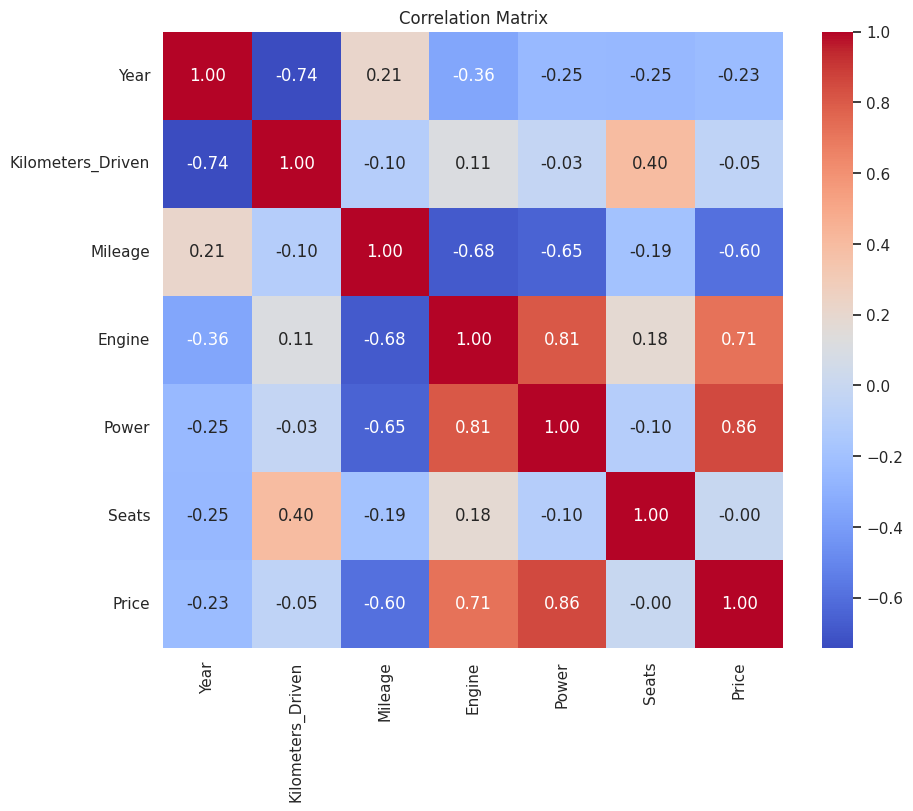

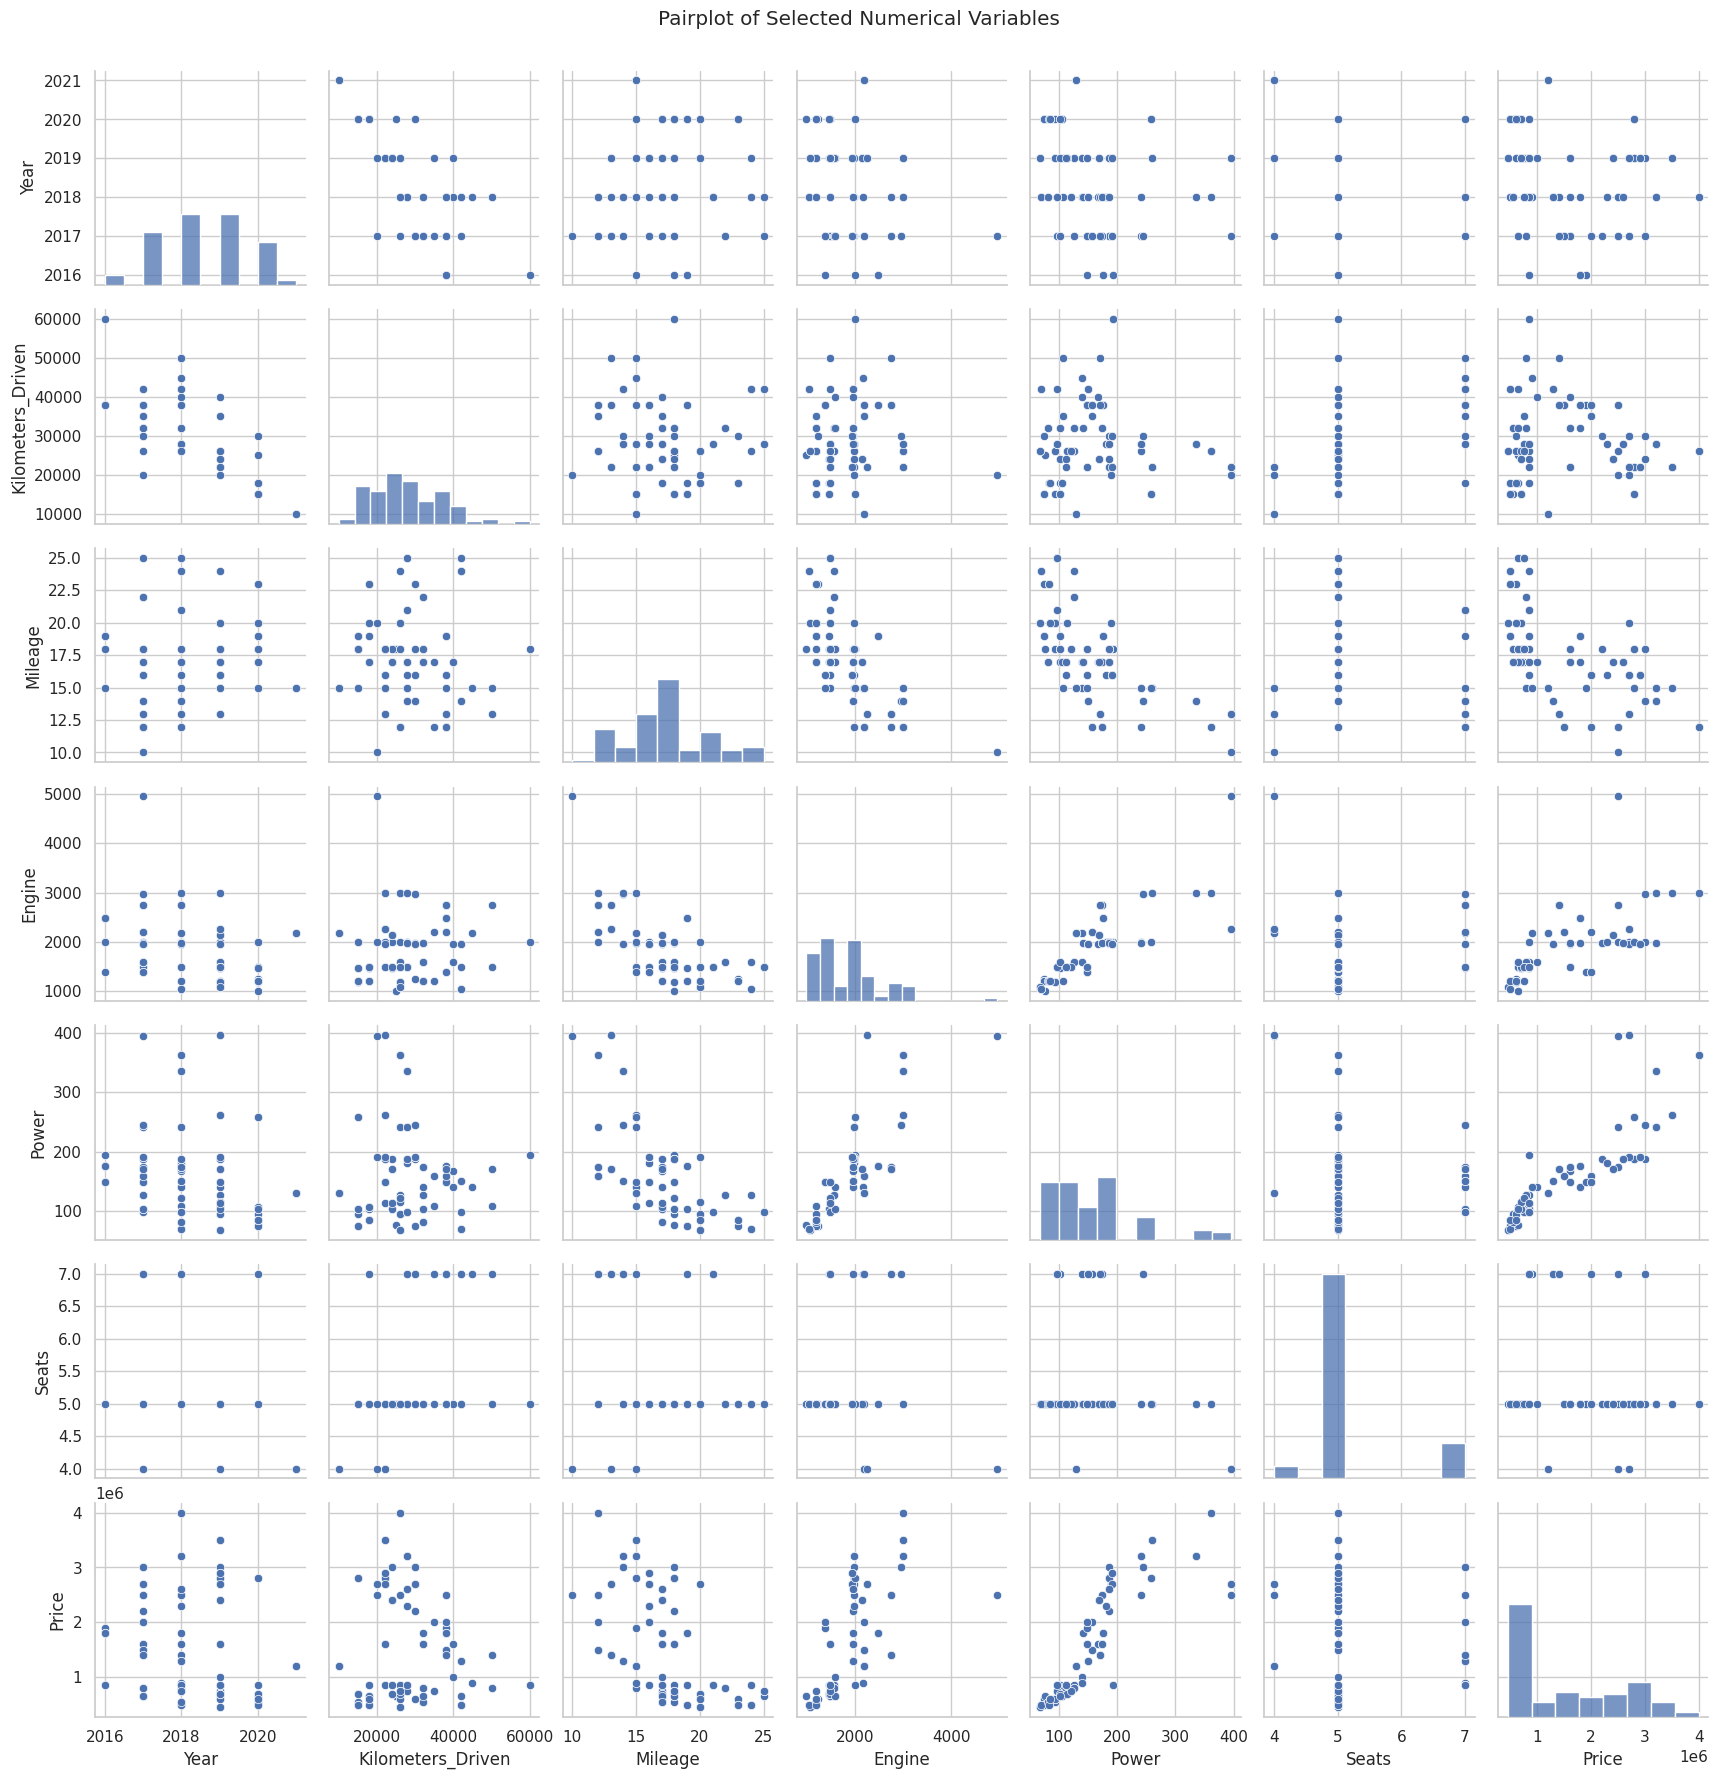

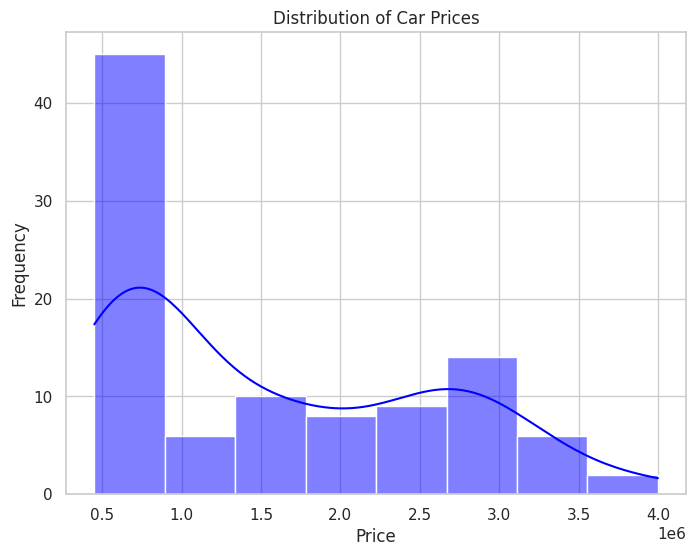

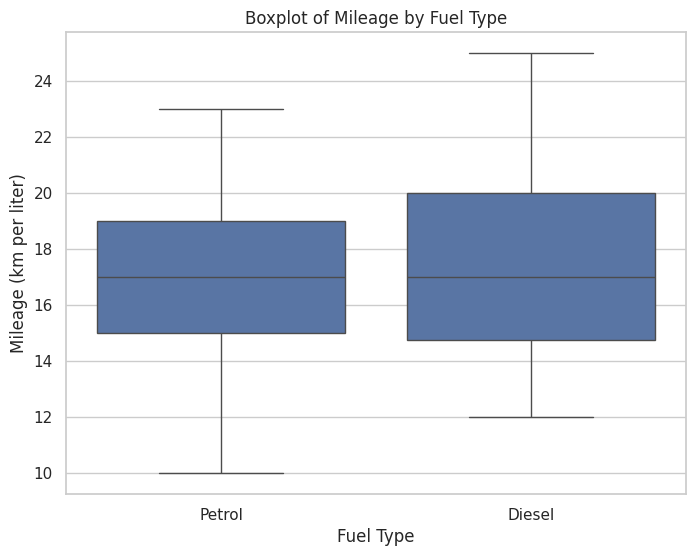

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = data

# Convert appropriate columns to numeric if not already
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization 1: Correlation Matrix
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualization 2: Pairplot for select numerical variables
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Selected Numerical Variables', y=1.02)
plt.show()

# Visualization 3: Distribution of Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Boxplot of Mileage by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', data=df)
plt.title('Boxplot of Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (km per liter)')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df = df[numeric_cols]

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<ipython-input-3-182badb6f34d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model to your training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions using your test data (X_test)
y_pred = model.predict(X_test_scaled)
y_pred

array([1515399.64690947, 1068051.12978055, 1702478.19873427,
       1515399.64690947, 1242945.56734106, 1003790.50972335,
       1142956.0399731 ,  455524.14573919, 1866617.52607798,
        852407.84661362, 1879579.91795849,  864710.22784436,
        684954.60514622,  986746.98905521,  726029.38968304,
       1800588.77858505, 3895218.51259967, 1003790.50972335,
       1130514.57266056, 1256534.97739498, 1928868.27017472,
       4178373.43378301, 2573361.08372133,  455524.14573919,
       1256534.97739498,  801348.07651253, 1582939.46076031,
       1974510.75617036, 1937964.58581003,  876693.07813642])

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R-squared: 0.71
Mean Absolute Error: 390448.05
Mean Squared Error: 262840028811.65
